In [1]:
import sys

# Manually specify the path to the parent directory
parent_dir = '/Users/declanbracken/Development/UofT_Projects/Meng_Project/code_base'  # Replace this with the path where 'Pipelines' is located
sys.path.append(parent_dir)

# Import vision_pipeline from Pipelines
from Pipelines.vision_pipeline import vision_pipeline
from string_clustering.table_clustering_v1 import TextClusterer

Loading Vision Model...
Model loaded successfully.


0: 800x1024 10 grade headerss, 5 grade tables, 5 singe row tables, 179.8ms
Speed: 5.8ms preprocess, 179.8ms inference, 1.1ms postprocess per image at shape (1, 3, 800, 1024)


Image path: /Users/declanbracken/Development/UofT_Projects/Meng_Project/Transcripts/Web_Scraped_Transcripts/2015-queens-university-transcript-1-2048.webp


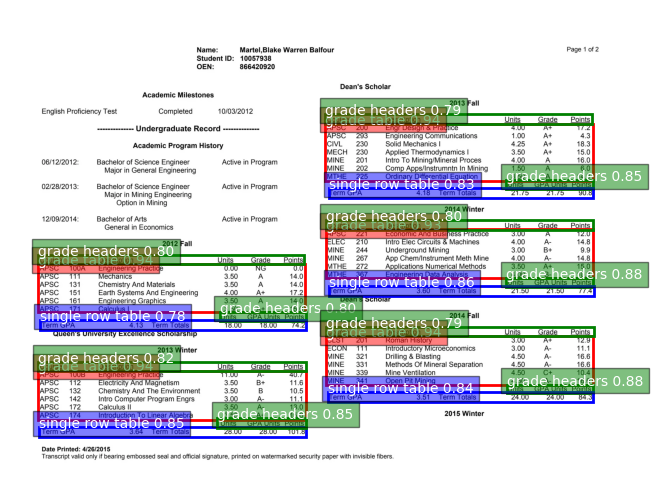

In [2]:

image_directory = '/Users/declanbracken/Development/UofT_Projects/Meng_Project/Transcripts/Web_Scraped_Transcripts/'
image_name = '2015-queens-university-transcript-1-2048.webp'
image_path = image_directory + image_name

model_path = '/Users/declanbracken/Development/UofT_Projects/Meng_Project/code_base/yolo_training/yolo_v8_models/finetune_v5/best.pt'
pipeline = vision_pipeline(model_path)
results = pipeline.predict(image_path, plot = True, iou = 0.3, conf = 0.5, agnostic_nms = True)

In [3]:
text_clusterer = TextClusterer(image_path, results)
text_clusterer.classify_text()
tables_data = text_clusterer.extract_horizontal_positions(text_clusterer.tables)
# # Create Dataframe
all_tables_df = text_clusterer.process_tables_to_dataframe(tables_data)

Optimal `eps`: 27.5, with Davies-Bouldin Index: 0.29393355790343706
Optimal `eps`: 27.5, with Davies-Bouldin Index: 0.23760832636543774
Optimal `eps`: 27.5, with Davies-Bouldin Index: 0.21471276905574296
Optimal `eps`: 27.5, with Davies-Bouldin Index: 0.25546057055446486
Optimal `eps`: 27.5, with Davies-Bouldin Index: 0.2741369547726482


In [18]:
# Example usage:
# Assuming `tables_data` contains your extracted OCR tables
# text_clusterer = TextClusterer()
print(text_clusterer.tables)


[{'box': array([     1040.4,      377.89,      1926.3,         566,      0.9417,           1], dtype=float32), 'text': {'level': [1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num':

In [17]:
tables_data[0]


{'positions': array([[  7,  69],
        [104, 141],
        [202, 250],
        [257, 327],
        [336, 350],
        [358, 440],
        [616, 660],
        [722, 750],
        [834, 876],
        [  7,  69],
        [104, 141],
        [202, 323],
        [332, 503],
        [618, 660],
        [722, 750],
        [845, 876],
        [  8,  58],
        [104, 141],
        [201, 250],
        [260, 369],
        [378, 381],
        [616, 660],
        [722, 750],
        [834, 876],
        [  8,  73],
        [104, 141],
        [200, 276],
        [285, 462],
        [471, 474],
        [617, 660],
        [722, 750],
        [834, 876],
        [  8,  64],
        [104, 138],
        [202, 246],
        [254, 280],
        [288, 437],
        [446, 516],
        [616, 660],
        [729, 744],
        [834, 876],
        [  8,  64],
        [104, 141],
        [201, 261],
        [269, 437],
        [447, 463],
        [472, 538],
        [618, 660],
        [729, 744],
       

In [13]:
print(clustered_tables[7])  # Example of accessing the first table

                             Line
0  APSC 111 Mechanics 3.50 A 14.0


In [4]:
all_tables_df

,0,1,2,3,4,5
0,APSC,200,Engr Design & Practice,4.00,At,17.2
1,APSC,293,Engineering Communications,1.00,At,4.3
2,CIVL,230,Solid Mechanics |,4.25,At,18.3
3,MECH,230,Applied Thermodynamics |,3.50,At,15.0
4,MINE,201,Intro To Mining/Mineral Proces,4.00,A,16.0
5,MINE,202,Comp Apps/Instrumntn In Mining,1.50,A,6.0
6,MTHE,225,Ordinary Differential Equation,3.50,A,14.0
7,APSC,100A,Engineering Practice,0.00,NG,0.0
8,APSC,111,Mechanics,3.50,A,14.0
9,APSC,131,Chemistry And Materials,3.50,A,14.0


<PIL.Image.Image image mode=RGB size=886x188 at 0x103CBAAF0>
Optimal `eps`: 27.5, with Davies-Bouldin Index: 0.29393355790343706


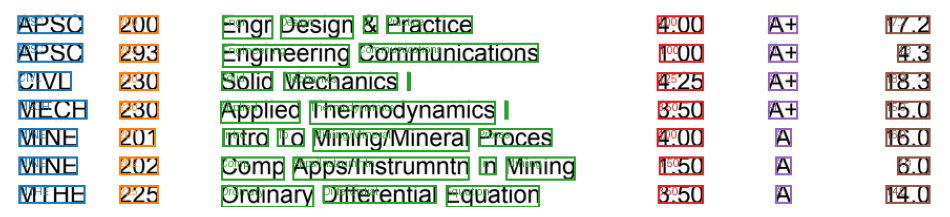

Silhouette Score:  0.689641334915855
Davies-Bouldin Index:  0.29393355790343706
Calinski-Harabasz Index:  210.22344655805557


In [5]:
# Grab single table
table_idx = 0
first_table_data = tables_data[table_idx]
image = text_clusterer.cropped_images[table_idx]
print(image)
# Unpack the dictionary into variables
positions = first_table_data['positions']
texts = first_table_data['texts']
y_positions = first_table_data['y_positions']
# Get Labels
optimal_eps = text_clusterer.binary_search_optimize_eps(positions)
labels = text_clusterer.perform_clustering(positions, eps = optimal_eps)
# Plot
text_clusterer.plot_results(image, positions, texts, labels, y_positions)
# Check scores
text_clusterer.calculate_clustering_metrics(positions,labels)

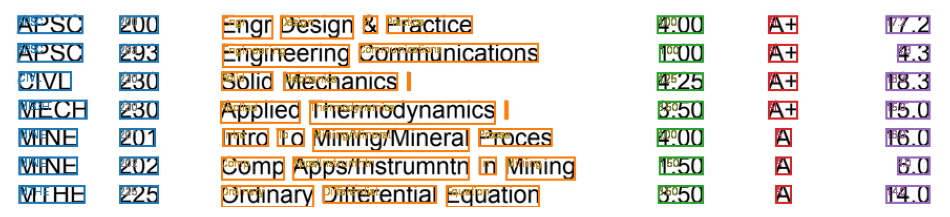

Silhouette Score:  0.6958030452664672
Davies-Bouldin Index:  0.33400859400780636
Calinski-Harabasz Index:  236.57276473845732


In [29]:
# Get Labels
labels = text_clusterer.perform_clustering(positions, eps = 50)
# Plot
text_clusterer.plot_results(image, positions, texts, labels, y_positions)
# Check scores
text_clusterer.calculate_clustering_metrics(positions,labels)